In [278]:
# load usual python packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime as dt
import pgeocode
#import seaborn



#from tqdm import tqdm


# for reading and displaying images
#from skimage.io import imread
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'

#from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point




# for creating validation set
#from sklearn.model_selection import train_test_split

# for evaluating the model
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score
#from sklearn.utils import resample
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import TimeSeriesSplit
#from sklearn.model_selection import cross_val_predict

ImportError: No module named 'seaborn'

In [161]:
def get_drug_usage_per_area(drug_df, drug_df_area,ccg_info, ccg_codes_for_area):
    areas_df = pd.DataFrame(list(drug_df.iloc[:,0]),columns=['date'])
    #print (len(areas_df))
    test = drug_df_area.merge(ccg_info[['CCG_CODE','CODE','POSTCODE']], on='CODE')
    for i in ccg_codes_for_area:
        ccg_area_codes = test[test['CCG_CODE'] == i]
        areas_df[i] = drug_df[list(ccg_area_codes['CODE'])].sum(axis=1)
    return areas_df
        

In [301]:
#load data
data_040301 = pd.read_csv('D:\\AIHack20\\nhs_data\\nhs_data\\040301.csv').dropna(axis=1)
data_040302 = pd.read_csv('D:\\AIHack20\\nhs_data\\nhs_data\\040302.csv').dropna(axis=1)
data_040303 = pd.read_csv('D:\\AIHack20\\nhs_data\\nhs_data\\040303.csv').dropna(axis=1)
data_040304 = pd.read_csv('D:\\AIHack20\\nhs_data\\nhs_data\\040304.csv').dropna(axis=1)
QStatus_Age_Sex_v2 = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/QStatus_Age_Sex-v2.csv')
achievement = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/ACHIEVEMENT.csv')
bnf_sections = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/bnf_sections.csv')
bnf_stems = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/BNF_stems.csv')
adresses = pd.read_csv('D:/AIHack20/epraccur/epraccur.csv')
indicator_mappings = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/INDICATOR_MAPPINGS.csv', sep=',',encoding='latin1')
epcmem =pd.read_csv('D:/AIHack20/epcmem/epcmem.csv')
egpcur = pd.read_csv('D:/AIHack20/egpcur/egpcur.csv')
reg_pat = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/gp-reg-pat-prac-all.csv')
world_cities = pd.read_csv('D:/AIHack20/simplemaps_worldcities_basicv1.6/worldcities.csv',encoding='latin1')

list_NG = [0,2,3,4,5,6,7]
working_NG =[]
for i in list_NG:
    working_NG.append(list_of_national_groups[i])
    
Biggest_UK_cities = world_cities[world_cities['country']=='United Kingdom'].sort_values(by='population', ascending=False)[0:20]

C:\Users\19ver\Anaconda2\envs\Py35\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [324]:
working_NG

['Y63', 'Y62', 'Y59', 'Y56', 'Y60', 'Y58', 'Y61']

In [32]:
print('Drug 040301 is used in {} gp practices for {} months'.format(data_040301.shape[1], data_040301.shape[0]))
print('Drug 040302 is used in {} gp practices for {} months'.format(data_040302.shape[1], data_040302.shape[0]))
print('Drug 040303 is used in {} gp practices for {} months'.format(data_040303.shape[1], data_040303.shape[0]))
print('Drug 040304 is used in {} gp practices for {} months'.format(data_040304.shape[1], data_040304.shape[0]))

Drug 040301 is used in 6816 gp practices for 28 months
Drug 040302 is used in 178 gp practices for 33 months
Drug 040303 is used in 6908 gp practices for 24 months
Drug 040304 is used in 6807 gp practices for 37 months


In [250]:
np.savetxt('National_Grouping_Codes_England', working_NG, '%s')

In [33]:
nomi = pgeocode.Nominatim('gb')

# for another drug replace 'data_040101'
#first name in columns have to be skipped since it gives the date 
gp_practices_040301 = data_040301.columns[1:]

gp_pr_use_040301 = pd.DataFrame(gp_practices_040301, columns=['CODE'])
gp_pr_w_postcode_040301 = gp_pr_use_040301.merge(adresses, on='CODE').dropna(axis=1)

gp_pr_w_postcode_040301['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301['postcode'])).longitude
gp_pr_w_postcode_040301['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301['postcode'])).latitude

#040302
gp_practices_040302 = data_040302.columns[1:]

gp_pr_use_040302 = pd.DataFrame(gp_practices_040302, columns=['CODE'])
gp_pr_w_postcode_040302 = gp_pr_use_040302.merge(adresses, on='CODE').dropna(axis=1)

gp_pr_w_postcode_040302['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040302['postcode'])).longitude
gp_pr_w_postcode_040302['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040302['postcode'])).latitude

#040303
gp_practices_040303 = data_040303.columns[1:]

gp_pr_use_040303 = pd.DataFrame(gp_practices_040303, columns=['CODE'])
gp_pr_w_postcode_040303 = gp_pr_use_040303.merge(adresses, on='CODE').dropna(axis=1)

gp_pr_w_postcode_040303['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040303['postcode'])).longitude
gp_pr_w_postcode_040303['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040303['postcode'])).latitude

#040304
gp_practices_040304 = data_040304.columns[1:]

gp_pr_use_040304 = pd.DataFrame(gp_practices_040304, columns=['CODE'])
gp_pr_w_postcode_040304 = gp_pr_use_040304.merge(adresses, on='CODE').dropna(axis=1)

gp_pr_w_postcode_040304['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040304['postcode'])).longitude
gp_pr_w_postcode_040304['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040304['postcode'])).latitude



In [280]:
gp_practices_040301 = data_040301.columns[1:]

gp_pr_use_040301 = pd.DataFrame(gp_practices_040301, columns=['CODE'])

list_of_national_groups = list(adresses['Unnamed: 2'].unique())
group0_adresses = adresses[adresses['Unnamed: 2'] == list_of_national_groups[0]]
group1_adresses = adresses[adresses['Unnamed: 2'] == list_of_national_groups[2]]
group2_adresses = adresses[adresses['Unnamed: 2']== list_of_national_groups[3]]
group3_adresses = adresses[adresses['Unnamed: 2']== list_of_national_groups[4]]

group4_adresses = adresses[adresses['Unnamed: 2'] == list_of_national_groups[5]]
group5_adresses = adresses[adresses['Unnamed: 2']== list_of_national_groups[6]]
group6_adresses = adresses[adresses['Unnamed: 2']== list_of_national_groups[7]]


# for another drug replace 'data_040101'
#first name in columns have to be skipped since it gives the date 
gp_pr_w_postcode_040301_group0 = gp_pr_use_040301.merge(group0_adresses, on='CODE').dropna(axis=1)
gp_pr_w_postcode_040301_group1 = gp_pr_use_040301.merge(group1_adresses, on='CODE').dropna(axis=1)
gp_pr_w_postcode_040301_group2 = gp_pr_use_040301.merge(group2_adresses,on='CODE').dropna(axis=1)
gp_pr_w_postcode_040301_group3 = gp_pr_use_040301.merge(group3_adresses,on='CODE').dropna(axis=1)

gp_pr_w_postcode_040301_group4 = gp_pr_use_040301.merge(group4_adresses, on='CODE').dropna(axis=1)
gp_pr_w_postcode_040301_group5 = gp_pr_use_040301.merge(group5_adresses,on='CODE').dropna(axis=1)
gp_pr_w_postcode_040301_group6 = gp_pr_use_040301.merge(group6_adresses,on='CODE').dropna(axis=1)




gp_pr_w_postcode_040301_group1['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group1['postcode'])).longitude
gp_pr_w_postcode_040301_group1['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group1['postcode'])).latitude

gp_pr_w_postcode_040301_group0['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group0['postcode'])).longitude
gp_pr_w_postcode_040301_group0['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group0['postcode'])).latitude

gp_pr_w_postcode_040301_group2['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group2['postcode'])).longitude
gp_pr_w_postcode_040301_group2['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group2['postcode'])).latitude

gp_pr_w_postcode_040301_group3['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group3['postcode'])).longitude
gp_pr_w_postcode_040301_group3['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group3['postcode'])).latitude

gp_pr_w_postcode_040301_group4['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group4['postcode'])).longitude
gp_pr_w_postcode_040301_group4['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group4['postcode'])).latitude

gp_pr_w_postcode_040301_group5['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group5['postcode'])).longitude
gp_pr_w_postcode_040301_group5['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group5['postcode'])).latitude

gp_pr_w_postcode_040301_group6['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group6['postcode'])).longitude
gp_pr_w_postcode_040301_group6['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode_040301_group6['postcode'])).latitude

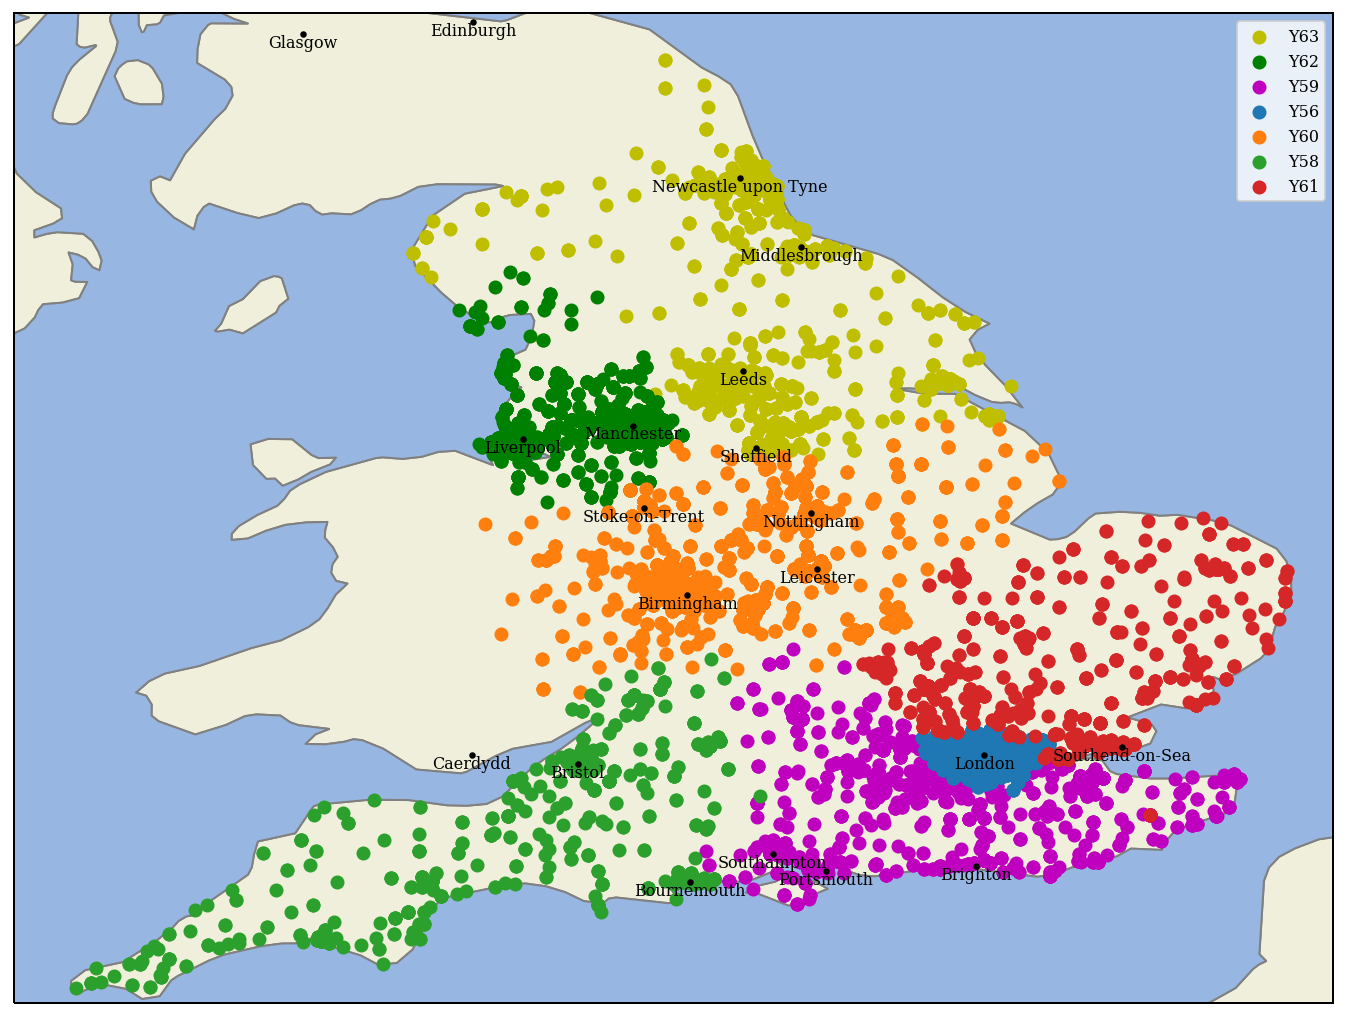

In [317]:
params = {
    'image.cmap': 'gray',
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.figsize': [40, 40],
    'font.family': 'serif',
    'savefig.format' : 'png'
}

matplotlib.rcParams.update(params)

#fig = plt.figure(figsize=(6,12)) # tall figure
#ax = fig.add_subplot(1, 2, 1, projection='polar')
#im = ax.pcolormesh(t, r, c.T)
#fig.colorbar(im, ax=ax, shrink=0.2)

fig = plt.figure(figsize=(26,28))
ax1 = fig.add_subplot(1,2, 1,projection=ccrs.PlateCarree())
#ax1 = fig.add_subplot(121)
ax1.set_ylim(50,56)
ax1.set_xlim(-6,2)
ax1.set_aspect(1.0)
#ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
ax1.add_feature(cfeature.BORDERS,edgecolor='grey')
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='grey',
                                        facecolor=cfeature.COLORS['land']))
ax1.add_feature(cfeature.NaturalEarthFeature('physical','ocean','50m',
                                             edgecolor='grey',
                                             facecolor=cfeature.COLORS['water']))
#ax1.add_feature(states_provinces)

#plt.scatter(gp_pr_w_postcode_040301['longitude'],gp_pr_w_postcode_040301['latitude'], c='b', label='040301', zorder=2)
plt.scatter(gp_pr_w_postcode_040301_group0['longitude'],gp_pr_w_postcode_040301_group0['latitude'], c='y', label=str(working_NG[0]),zorder=3)
plt.scatter(gp_pr_w_postcode_040301_group1['longitude'],gp_pr_w_postcode_040301_group1['latitude'], c='g', label=str(working_NG[1]),zorder=3)
plt.scatter(gp_pr_w_postcode_040301_group2['longitude'],gp_pr_w_postcode_040301_group2['latitude'], c='m', label=str(working_NG[2]),zorder=3)
plt.scatter(gp_pr_w_postcode_040301_group3['longitude'],gp_pr_w_postcode_040301_group3['latitude'], label=str(working_NG[3]),zorder=3)
plt.scatter(gp_pr_w_postcode_040301_group4['longitude'],gp_pr_w_postcode_040301_group4['latitude'], label=str(working_NG[4]),zorder=3)
plt.scatter(gp_pr_w_postcode_040301_group5['longitude'],gp_pr_w_postcode_040301_group5['latitude'], label=str(working_NG[5]),zorder=3)
plt.scatter(gp_pr_w_postcode_040301_group6['longitude'],gp_pr_w_postcode_040301_group6['latitude'], label=str(working_NG[6]),zorder=3)
for i in range(len(Biggest_UK_cities['lng'])):
    plt.scatter(np.array(Biggest_UK_cities['lng'])[i],np.array(Biggest_UK_cities['lat'])[i],s=5, c='black', zorder=3)
    plt.text(np.array(Biggest_UK_cities['lng'])[i],np.array(Biggest_UK_cities['lat'])[i],list(Biggest_UK_cities['city'])[i], horizontalalignment='center', verticalalignment = 'top', fontsize=8)
plt.legend(loc='best')


#im1 = ax1.contourf(np.array(zg_dtrnd_norm_anom_1x1_2019['longitude']),np.array(zg_dtrnd_norm_anom_1x1_2019['latitude']),zg_dtrnd_norm_anom_1x1_2019[0],cmap='RdBu')
#im3 = ax1.contourf(np.array(pv_file['longitude']),np.array(pv_file['latitude']),pv_file[1]) 
#divider = make_axes_locatable(ax1)
#cax1 = divider.append_axes("right", size="5%", pad=0.05)
#fig.colorbar(ax=ax1,shrink=0.3)
#plt.savefig('NOICE_MAP_drug_040301_by_region.png',dpi=500)
plt.show()

In [ ]:
London = adresses[adresses['Unnamed: 6']=='LONDON']
london_codes = London.merge(reg_pat[['CCG_CODE','CODE','POSTCODE']], on='CODE')
london_ccg_codes = list(london_codes['CCG_CODE'].unique())

In [323]:
def drug_usage_per_national_group_area(ng_codes,adress_df, drug_df):
    drug_usage_per_area = pd.DataFrame(list(drug_df.iloc[:,0]),columns=['date'])
    gp_practice_area_codes =  drug_df.columns[1:]
    gp_practice_ac_df = pd.DataFrame(gp_practice_area_codes, columns=['CODE'])
    for i in ng_codes:
        filtered_adress = adress_df[adress_df['Unnamed: 2']==i]
        drug_usage_per_area[str(i)] = drug_df[list(gp_practice_ac_df.merge(filtered_adress, on='CODE')['CODE'])].sum(axis=1)
    return drug_usage_per_area


drug_040301_uk = drug_usage_per_national_group_area(working_NG,adresses,data_040301)

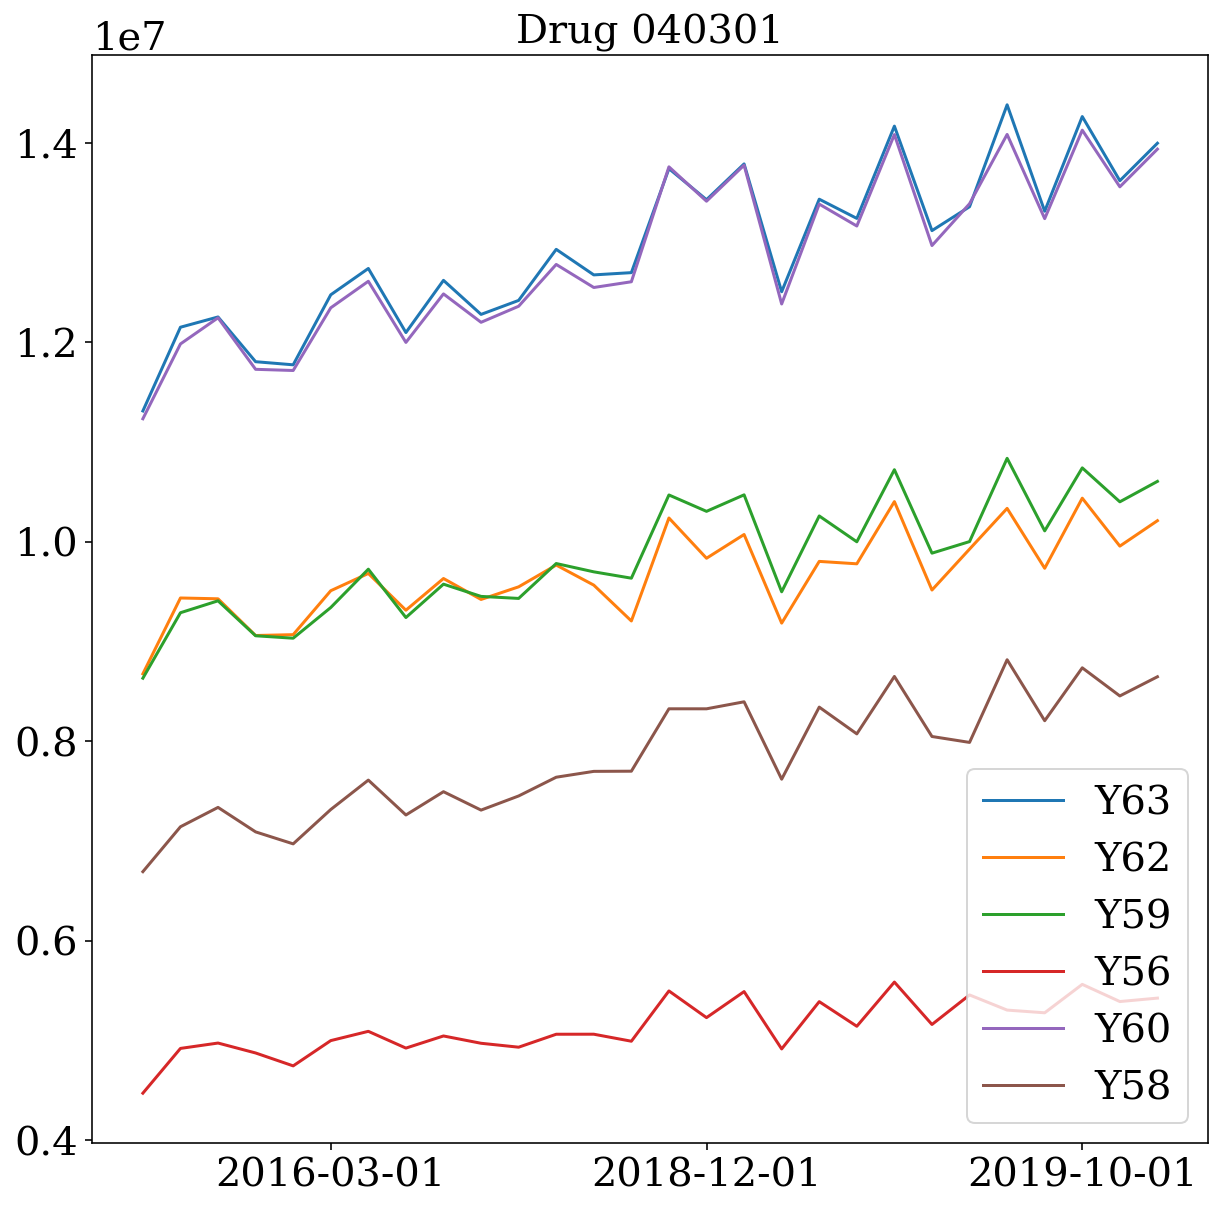

In [325]:
params = {
    'image.cmap': 'gray',
    'axes.labelsize': 20, # fontsize for x and y labels (was 10)
    'axes.titlesize': 20,
    'font.size': 20, # was 10
    'legend.fontsize': 20, # was 10
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'figure.figsize': [10, 10],
    'font.family': 'serif',
}

matplotlib.rcParams.update(params)


for i in range(1,len(drug_040301_uk.columns)-1):
    plt.plot(drug_040301_uk['date'], drug_040301_uk.iloc[:,i], label=str(drug_040301_uk.columns[i]))
    
plt.title('Drug 040301')
plt.legend(loc='best')
plt.xticks([5,15,25])
plt.show()

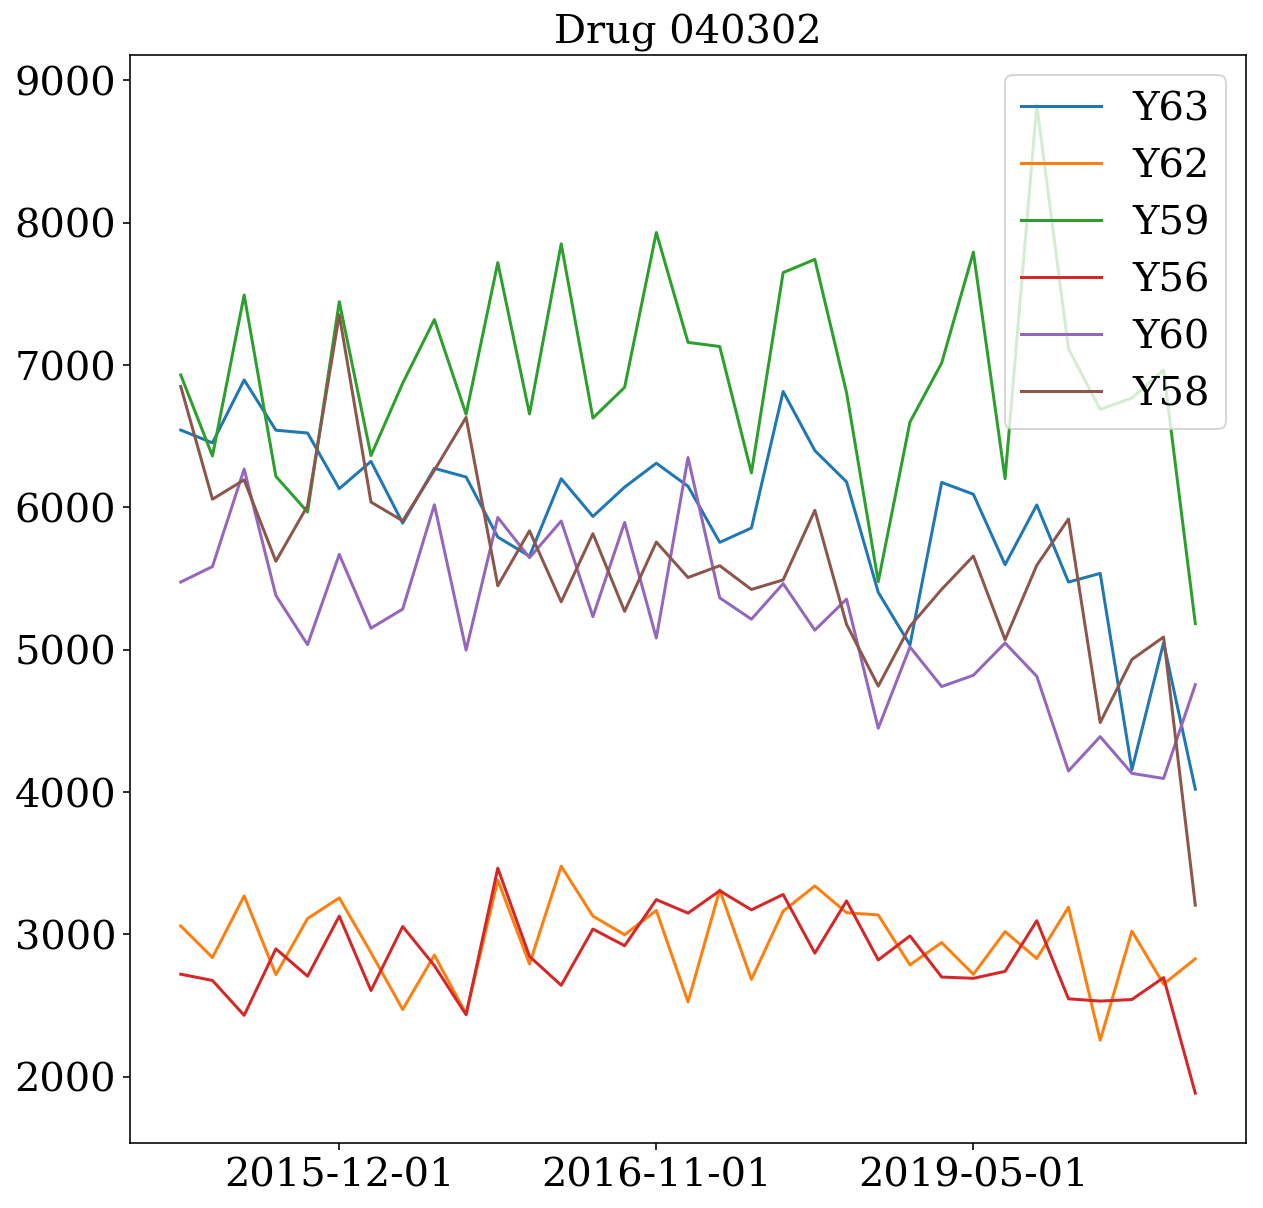

In [326]:
drug_040302_uk = drug_usage_per_national_group_area(working_NG,adresses,data_040302)

params = {
    'image.cmap': 'gray',
    'axes.labelsize': 20, # fontsize for x and y labels (was 10)
    'axes.titlesize': 20,
    'font.size': 20, # was 10
    'legend.fontsize': 20, # was 10
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'figure.figsize': [10, 10],
    'font.family': 'serif',
}

matplotlib.rcParams.update(params)


for i in range(1,len(drug_040302_uk.columns)-1):
    plt.plot(drug_040302_uk['date'], drug_040302_uk.iloc[:,i], label=str(drug_040302_uk.columns[i]))
    
plt.title('Drug 040302')
plt.legend(loc='best')
plt.xticks([5,15,25])
plt.show()

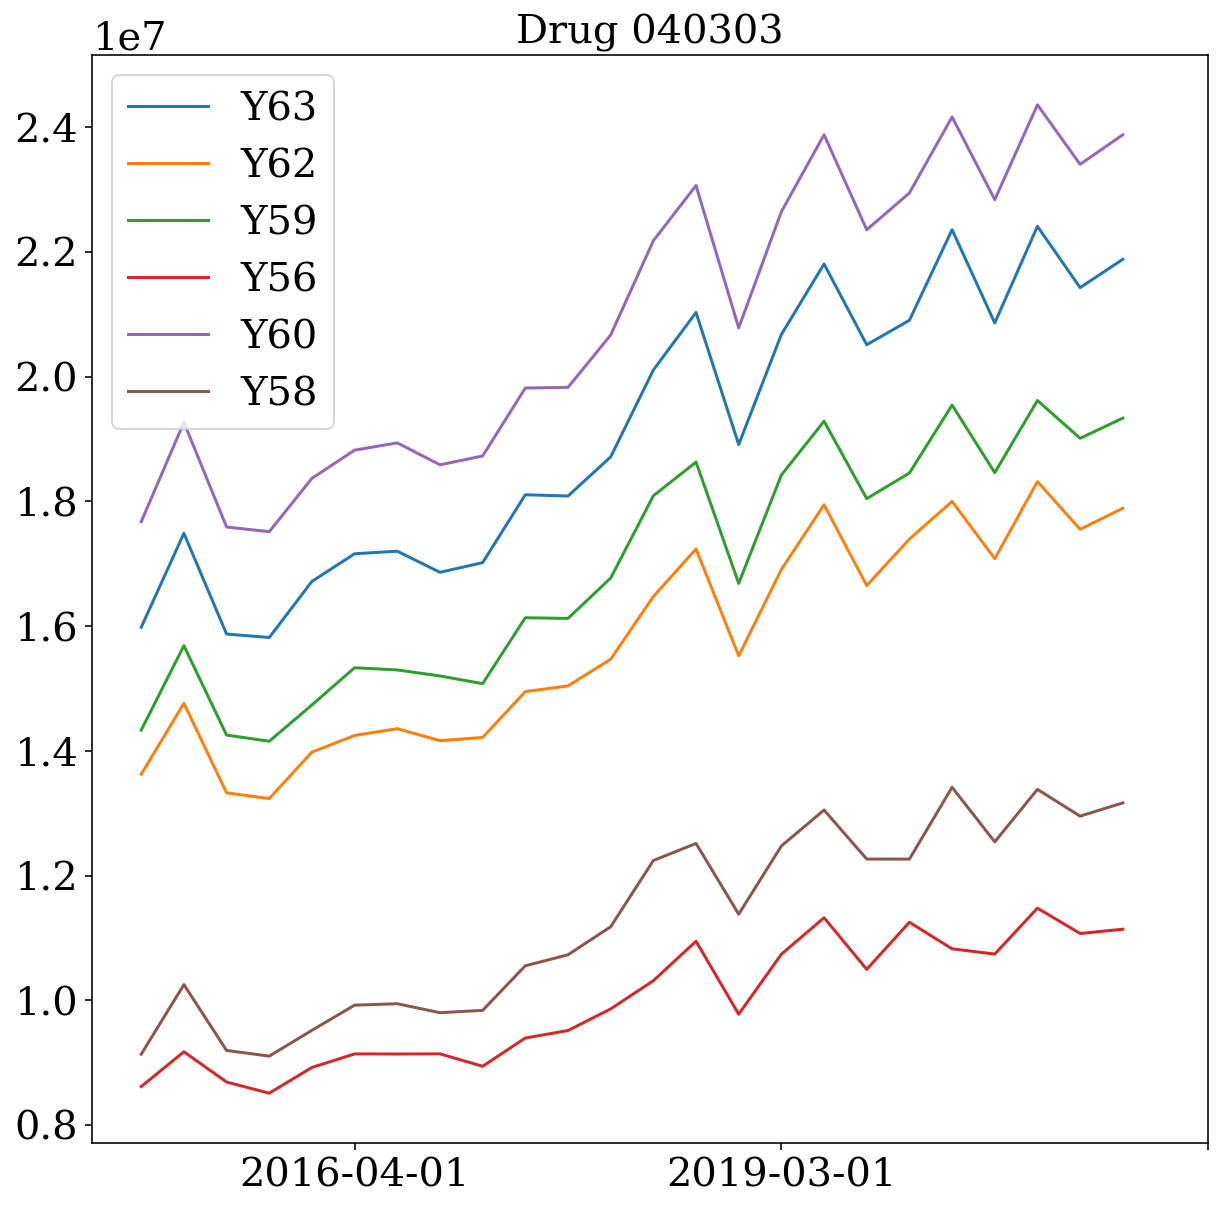

In [327]:
drug_040303_uk = drug_usage_per_national_group_area(working_NG,adresses,data_040303)

params = {
    'image.cmap': 'gray',
    'axes.labelsize': 20, # fontsize for x and y labels (was 10)
    'axes.titlesize': 20,
    'font.size': 20, # was 10
    'legend.fontsize': 20, # was 10
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'figure.figsize': [10, 10],
    'font.family': 'serif',
}

matplotlib.rcParams.update(params)


for i in range(1,len(drug_040303_uk.columns)-1):
    plt.plot(drug_040303_uk['date'], drug_040303_uk.iloc[:,i], label=str(drug_040303_uk.columns[i]))
    
plt.title('Drug 040303')
plt.legend(loc='best')
plt.xticks([5,15,25])
plt.show()

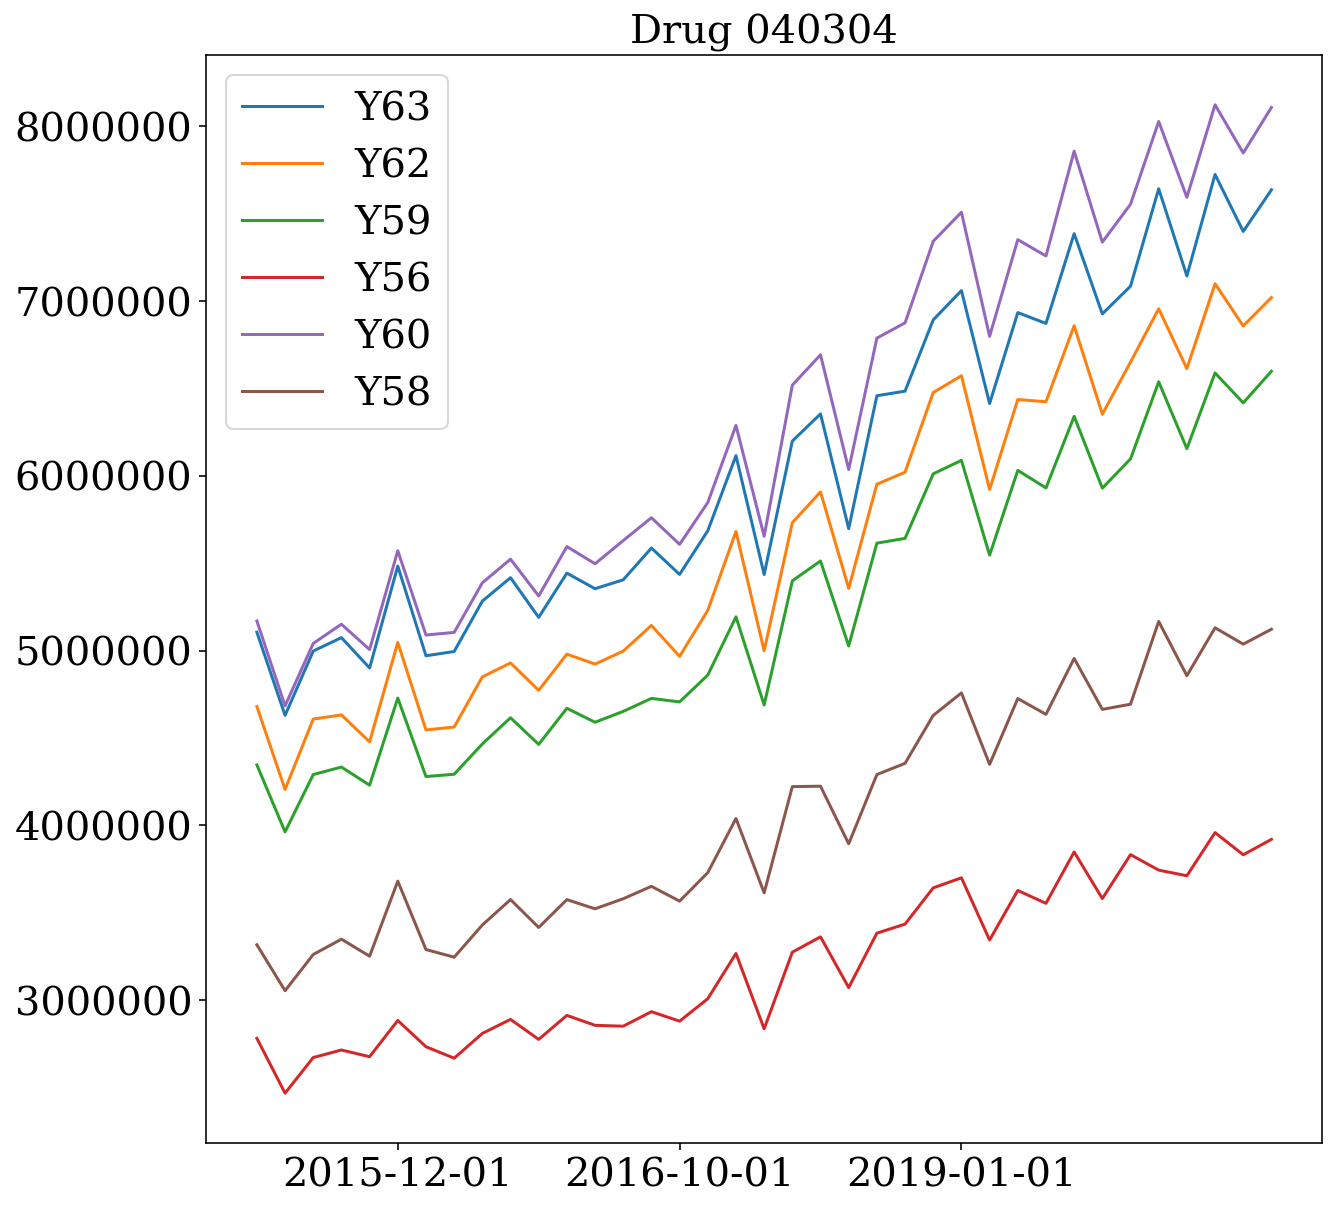

In [328]:
drug_040304_uk = drug_usage_per_national_group_area(working_NG,adresses,data_040304)

params = {
    'image.cmap': 'gray',
    'axes.labelsize': 20, # fontsize for x and y labels (was 10)
    'axes.titlesize': 20,
    'font.size': 20, # was 10
    'legend.fontsize': 20, # was 10
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'figure.figsize': [10, 10],
    'font.family': 'serif',
}

matplotlib.rcParams.update(params)


for i in range(1,len(drug_040304_uk.columns)-1):
    plt.plot(drug_040304_uk['date'], drug_040304_uk.iloc[:,i], label=str(drug_040304_uk.columns[i]))
    
plt.title('Drug 040304')
plt.legend(loc='best')
plt.xticks([5,15,25])
plt.show()